<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:28px; border-radius:8px; box-shadow:0 2px 8px #00004733;" src='alinco.png' width="120"/>
<div style="margin-left:150px;">
<h1 style="color:#000047; font-size:2.3em; margin-bottom:0;">Actividad 2</h1>
<h2 style="color:#003366; font-size:1.3em; margin-top:0;">Identificación, Preprocesamiento y Distribución de los datos</h2>
</div>
<br style="clear:both"/>
</div>



<div style="border-left:6px solid #000047; padding:18px; margin-top:18px; background:#f5f5f5; border-radius:8px;">
<span style="font-size:1.1em;"><b>Objetivo:</b> 
Practicar los métodos vistos en clase para la identificación de datos faltantes, outliers y análisis de la distribución de los datos, utilizando herramientas estadísticas y visuales modernas.</span>
<ul style="margin-top:10px;">
<li>Aplicar técnicas de análisis exploratorio de datos (EDA) para comprender la calidad y forma de los datos.</li>
<li>Identificar y tratar valores atípicos (outliers) tanto univariados como multivariados.</li>
<li>Visualizar y comparar distribuciones para tomar mejores decisiones en el preprocesamiento.</li>
</ul>
</div>

<div style="margin-top:18px; background:#f0f7ff; border-radius:8px; padding:14px; border:1px solid #b3c6ff;">
<b>Instrucciones generales:</b>
<ul style="margin-bottom:0;">
<li>Lee cuidadosamente cada sección y realiza los ejercicios propuestos.</li>
<li>Utiliza <b>la librería creada (HyAIA) en clase</b> para contestar lo que se pide.</li>
<li>Incluye comentarios y conclusiones breves en cada sección para reflexionar sobre los resultados obtenidos.</li>
<li>Recuerda que puedes agregar celdas de código o markdown adicionales si lo consideras necesario para explicar tu proceso.</li>
</ul>
</div>

<div style="margin-top:18px; background:#fffbe6; border-radius:8px; padding:12px; border:1px solid #ffe066;">
<b>Tip:</b> Aprovecha las funciones de visualización para interpretar mejor los resultados y justificar tus respuestas.
</div>

<h2 style="color:#003366; margin-top:0;">1. Medidas de posición y de forma <span style='font-size:0.7em; color:#888;'>&#128202;</span></h2>
<p style="font-size:1.1em;">
En esta sección analizarás el <b>dataset <code>tips</code> de la librería <code>seaborn</code></b> para practicar el análisis de calidad, distribución y forma de los datos.
</p>
<ul style="font-size:1.05em;">
<li><b>1.</b> <span style='color:#000047;'>Carga el dataset:</span> <code>sns.load_dataset('tips')</code></li>
<li><b>2.</b> <span style='color:#000047;'>Reporte de calidad:</span> Usa <code>dqr()</code> para obtener un resumen de los datos.</li>
<li><b>3.</b> <span style='color:#000047;'>Asimetría y curtósis:</span> Calcula estos valores para cada columna numérica.</li>
<li><b>4.</b> <span style='color:#000047;'>Visualización:</span> Grafica la distribución y medidas de forma de <code>total_bill</code>.</li>
<li><b>5.</b> <span style='color:#000047;'>Comparación por día:</span> Compara asimetría y curtósis de <code>total_bill</code> por <code>day</code>.</li>
<li><b>6.</b> <span style='color:#000047;'>Cuartiles:</span> Calcula los cuartiles de <code>tip</code>.</li>
<li><b>7.</b> <span style='color:#000047;'>Diagrama de cajas:</span> Visualiza <code>tip</code> y comenta tus observaciones.</li>
</ul>
<div style="margin-top:12px; background:#e6f2ff; border-left:4px solid #003366; padding:10px 18px; border-radius:8px;">
<b>Consejo:</b> Utiliza gráficos como histogramas, boxplots y tablas resumen para enriquecer tu análisis.
</div>

In [2]:
# Alma Trejo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

# ---------- Definir dqr() ----------
def dqr(df: pd.DataFrame) -> pd.DataFrame:
    """
    Data Quality Report (DQR)
    Devuelve: Type, N_Null, Pct_Null, N_Unique, Is_categorical
    """
    report = pd.DataFrame({
        "Type": df.dtypes.astype(str),
        "N_Null": df.isnull().sum(),
        "Pct_Null": (df.isnull().mean() * 100).round(2),
        "N_Unique": df.nunique(dropna=True)
    })
    report["Is_categorical"] = report["Type"].apply(lambda t: True if ("object" in t or "category" in t) else False)
    report.index.name = "column"
    return report

# ---------- Cargar dataset (robusto) ----------
try:
    tips = sns.load_dataset("tips")
    print("Dataset 'tips' cargado desde seaborn.")
except Exception as e:
    print("No fue posible cargar desde seaborn (posible falta de red). Intentando 'tips.csv'...")
    try:
        tips = pd.read_csv("tips.csv", parse_dates=False)
        print("Dataset 'tips' cargado desde tips.csv en carpeta local.")
    except Exception as e2:
        print("No hay 'tips.csv' en la carpeta. Se usará un ejemplo reducido para practicar.")
        tips = pd.DataFrame({
            "total_bill": [16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77],
            "tip": [1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0],
            "sex": ["Female","Male","Male","Male","Female","Male","Male"],
            "smoker": ["No","No","No","No","No","No","No"],
            "day": ["Sun","Sun","Sun","Sun","Sun","Sun","Sun"],
            "time": ["Dinner","Dinner","Dinner","Dinner","Dinner","Dinner","Dinner"],
            "size": [2,3,3,2,4,4,2]
        })


Dataset 'tips' cargado desde seaborn.


In [3]:

# ---------- 1. Reporte de calidad ----------
report = dqr(tips)
print("\n--- DQR ---")
print(report)



--- DQR ---
                Type  N_Null  Pct_Null  N_Unique  Is_categorical
column                                                          
total_bill   float64       0       0.0       229           False
tip          float64       0       0.0       123           False
sex         category       0       0.0         2            True
smoker      category       0       0.0         2            True
day         category       0       0.0         4            True
time        category       0       0.0         2            True
size           int64       0       0.0         6           False


In [4]:

# ---------- 2. Skewness y Kurtosis para columnas numéricas ----------
numeric_cols = tips.select_dtypes(include=[np.number]).columns.tolist()
skewness = tips[numeric_cols].skew().rename("skewness")
kurtosis = tips[numeric_cols].kurtosis().rename("kurtosis")
shape_stats = pd.concat([skewness, kurtosis], axis=1)
print("\n--- Skewness y Kurtosis (columnas numéricas) ---")
print(shape_stats)



--- Skewness y Kurtosis (columnas numéricas) ---
            skewness  kurtosis
column                        
total_bill  1.133213  1.218484
tip         1.465451  3.648376
size        1.447882  1.731700


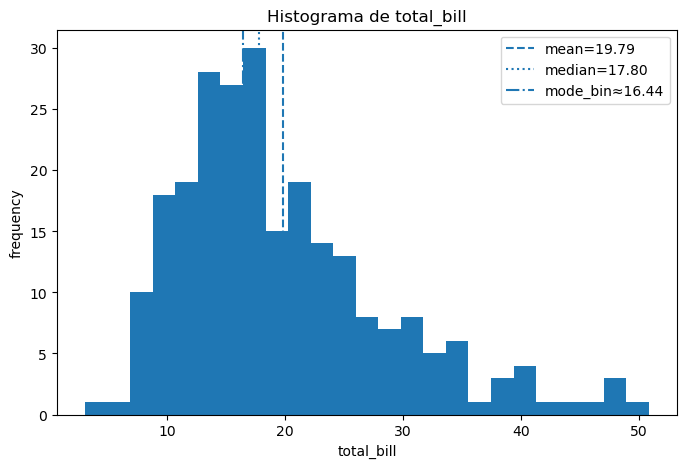

In [5]:

# ---------- 3. Visualización: distribución de total_bill ----------
if "total_bill" in tips.columns:
    total = tips["total_bill"].dropna()
    plt.figure(figsize=(8,5))
    plt.hist(total, bins=25)
    plt.axvline(total.mean(), linestyle="--", label=f"mean={total.mean():.2f}")
    plt.axvline(total.median(), linestyle=":", label=f"median={total.median():.2f}")
    # aproximación de mode por bin
    counts, bins = np.histogram(total, bins=25)
    mode_bin = bins[np.argmax(counts)]
    plt.axvline(mode_bin, linestyle="-.", label=f"mode_bin≈{mode_bin:.2f}")
    plt.xlabel("total_bill")
    plt.ylabel("frequency")
    plt.title("Histograma de total_bill")
    plt.legend()
    plt.show()
else:
    print("La columna 'total_bill' no está presente en el DataFrame de ejemplo.")



In [11]:
# ---------- 4. Comparación por día: skew y kurtosis de total_bill por day ----------
group_shape = tips.groupby("day")["total_bill"].agg(
    count="count",
    mean="mean",
    median="median",
    skew=lambda x: x.skew(),
    kurtosis=lambda x: x.kurtosis()
)

print("\n--- total_bill: shape por day ---")
print(group_shape)




--- total_bill: shape por day ---
      count       mean  median      skew  kurtosis
day                                               
Thur     62  17.682742   16.20  1.360770  1.819974
Fri      19  17.151579   15.38  1.316759  1.994452
Sat      87  20.441379   18.24  1.262112  1.715632
Sun      76  21.410000   19.63  0.823085  0.422241


C:\Users\famar\AppData\Local\Temp\ipykernel_2376\1777171003.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_shape = tips.groupby("day")["total_bill"].agg(


In [8]:

# ---------- 5. Cuartiles de tip ----------
if "tip" in tips.columns:
    tip_quartiles = tips["tip"].quantile([0, 0.25, 0.5, 0.75, 1]).rename(index={0:"min", 0.25:"Q1", 0.5:"median", 0.75:"Q3", 1:"max"})
    print("\n--- Cuartiles de 'tip' ---")
    print(tip_quartiles)
else:
    print("\nLa columna 'tip' no está disponible en el dataset de ejemplo.")



--- Cuartiles de 'tip' ---
min        1.0000
Q1         2.0000
median     2.9000
Q3         3.5625
max       10.0000
Name: tip, dtype: float64


C:\Users\famar\AppData\Local\Temp\ipykernel_2376\3449958299.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tips["tip"].dropna(), vert=True, labels=["tip"])


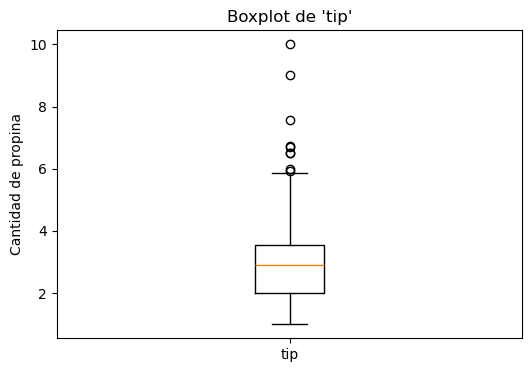

1) DQR: revisa tipos y nulos. Marca las columnas categóricas (Is_categorical True/False).
2) Forma:
   - total_bill: mean=19.79, median=17.80, skew=1.13, kurtosis=1.22.
   - Interpretación típica: skew>0 sugiere sesgo a la derecha (colas largas), kurtosis>0 sugiere colas pesadas.


In [12]:

# ---------- 6. Boxplot de tip ----------
if "tip" in tips.columns:
    plt.figure(figsize=(6,4))
    plt.boxplot(tips["tip"].dropna(), vert=True, labels=["tip"])
    plt.title("Boxplot de 'tip'")
    plt.ylabel("Cantidad de propina")
    plt.show()
else:
    print("No hay columna 'tip' para boxplot.")


print("1) DQR: revisa tipos y nulos. Marca las columnas categóricas (Is_categorical True/False).")
print("2) Forma:")
if mean_total is not None:
    print(f"   - total_bill: mean={mean_total:.2f}, median={median_total:.2f}, skew={skew_total:.2f}, kurtosis={kurt_total:.2f}.")
    print("   - Interpretación típica: skew>0 sugiere sesgo a la derecha (colas largas), kurtosis>0 sugiere colas pesadas.")
else:
    print("   - No se dispone de total_bill en el dataset de ejemplo para dar medidas.")


<h2 style="color:#b36b00; margin-top:0;">2. Datos Atípicos (Outliers) <span style='font-size:0.7em; color:#888;'>&#9888;&#65039;</span></h2>
<p style="font-size:1.1em;">
En este apartado identificarás y analizarás <b>outliers univariados y multivariados</b> usando diferentes datasets y técnicas.
</p>
<div style="background:#fff2cc; border-left:4px solid #b36b00; padding:10px 18px; border-radius:8px; margin-bottom:10px;">
<b>Univariado:</b> <br>
Utiliza el dataset <code>ds_salaries.csv</code> (en la misma ruta que este notebook).
<ol style="font-size:1.05em;">
<li><b>Análisis exploratorio:</b> Visualiza la distribución y diagramas de caja de cada variable. Agrega comentarios sobre tus hallazgos.</li>
<li><b>Identificación de outliers:</b> Aplica métodos vistos en clase según la distribución de cada variable.</li>
</ol>
</div>
<div style="background:#ffe6e6; border-left:4px solid #b30000; padding:10px 18px; border-radius:8px;">
<b>Multivariado:</b> <br>
Descarga y utiliza el dataset <a href="https://drive.google.com/file/d/19dZnyQcZzrQMkGWKETd-577r_SAN-Vfv/view?usp=drive_link" target="_blank"><code>credit_card.csv</code></a>.
<ol style="font-size:1.05em;">
<li><b>Identificación de outliers multivariados:</b> Aplica técnicas multivariadas vistas en clase para detectar valores atípicos.</li>
</ol>
</div>


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ds_salaries.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


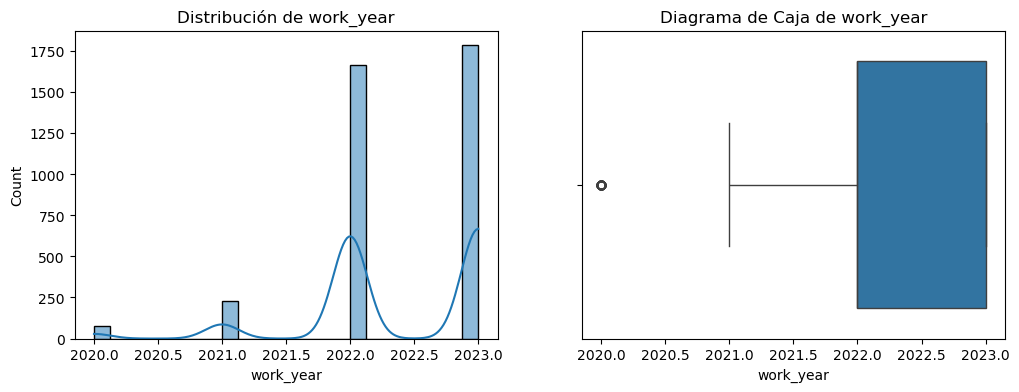

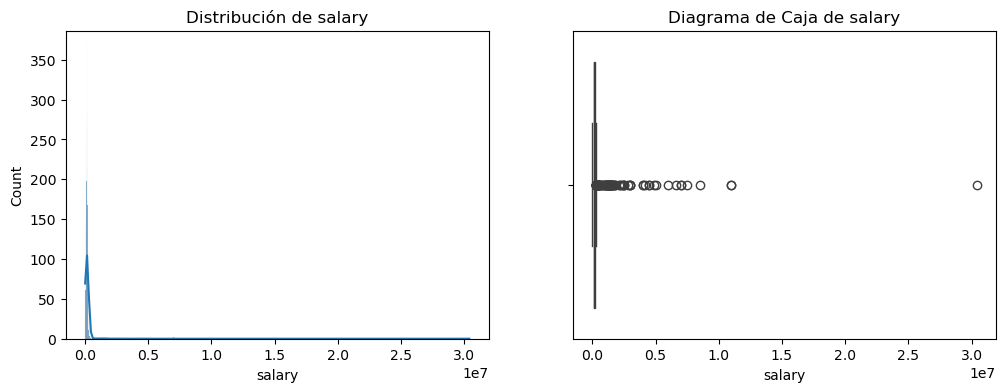

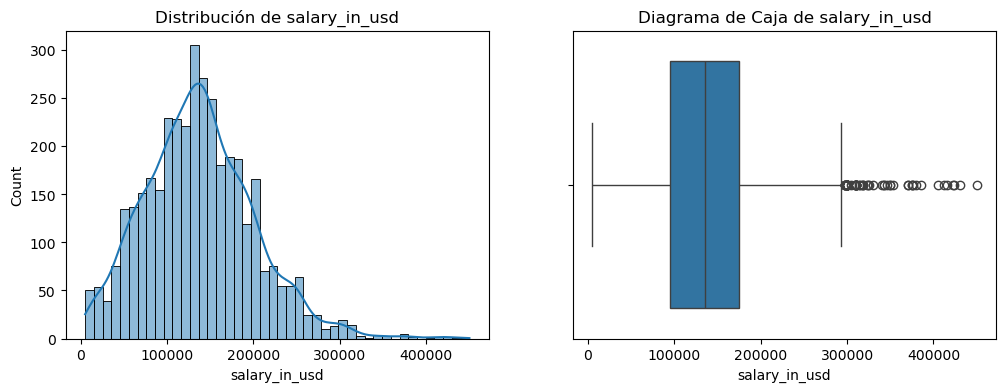

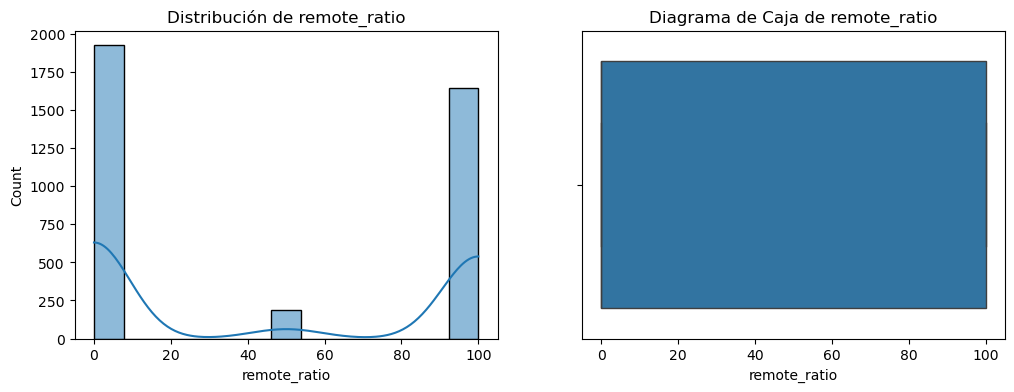

In [14]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Diagrama de Caja de {col}")

    plt.show()


In [17]:
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)]

for col in num_cols:
    outliers = iqr_outliers(df[col])
    print(f"{col}: {len(outliers)} outliers")


work_year: 76 outliers
salary: 113 outliers
salary_in_usd: 63 outliers
remote_ratio: 0 outliers


In [18]:
from scipy.stats import zscore

for col in num_cols:
    zs = zscore(df[col])
    outliers = df[abs(zs) > 3][col]
    print(f"{col}: {len(outliers)} outliers (Z-score)")


work_year: 76 outliers (Z-score)
salary: 25 outliers (Z-score)
salary_in_usd: 22 outliers (Z-score)
remote_ratio: 0 outliers (Z-score)
